# Imports

In [1]:
!pip install -q tensorflow==1.15.2
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


Bad key "text.kerning_factor" on line 4 in
C:\Users\bcpython\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Defining the hyperparameters of the models

In [2]:
learning_rate = 0.01
training_epochs = 4000
display_step = 200

# Defining the datasets for training and tests
# Consider x as the size of a house and y as the price

In [3]:
# Training dataset
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
 
# Tests dataset
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

# Defining placeholders and variables

In [5]:
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weight')
b = tf.Variable(np.random.randn(), name = 'bias')

# Building the model

In [6]:
#linear regression formula -> y = WX  + b
linear_model = W*X + b

#Mean squared error
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples)

#Optimization with Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Executing the graph, training and testing the model

Epoch: 200 	 Error: 0.109 	 Weight: 0.353 	 b: 0.0774 
Epoch: 400 	 Error: 0.0967 	 Weight: 0.331 	 b: 0.233 
Epoch: 600 	 Error: 0.0891 	 Weight: 0.314 	 b: 0.355 
Epoch: 800 	 Error: 0.0844 	 Weight: 0.301 	 b: 0.451 
Epoch: 1000 	 Error: 0.0815 	 Weight: 0.29 	 b: 0.526 
Epoch: 1200 	 Error: 0.0798 	 Weight: 0.282 	 b: 0.585 
Epoch: 1400 	 Error: 0.0787 	 Weight: 0.275 	 b: 0.631 
Epoch: 1600 	 Error: 0.078 	 Weight: 0.27 	 b: 0.667 
Epoch: 1800 	 Error: 0.0776 	 Weight: 0.266 	 b: 0.695 
Epoch: 2000 	 Error: 0.0773 	 Weight: 0.263 	 b: 0.718 
Epoch: 2200 	 Error: 0.0772 	 Weight: 0.261 	 b: 0.735 
Epoch: 2400 	 Error: 0.0771 	 Weight: 0.259 	 b: 0.749 
Epoch: 2600 	 Error: 0.077 	 Weight: 0.257 	 b: 0.76 
Epoch: 2800 	 Error: 0.077 	 Weight: 0.256 	 b: 0.768 
Epoch: 3000 	 Error: 0.077 	 Weight: 0.255 	 b: 0.775 
Epoch: 3200 	 Error: 0.077 	 Weight: 0.254 	 b: 0.78 
Epoch: 3400 	 Error: 0.0769 	 Weight: 0.254 	 b: 0.784 
Epoch: 3600 	 Error: 0.0769 	 Weight: 0.253 	 b: 0.787 
Epoch

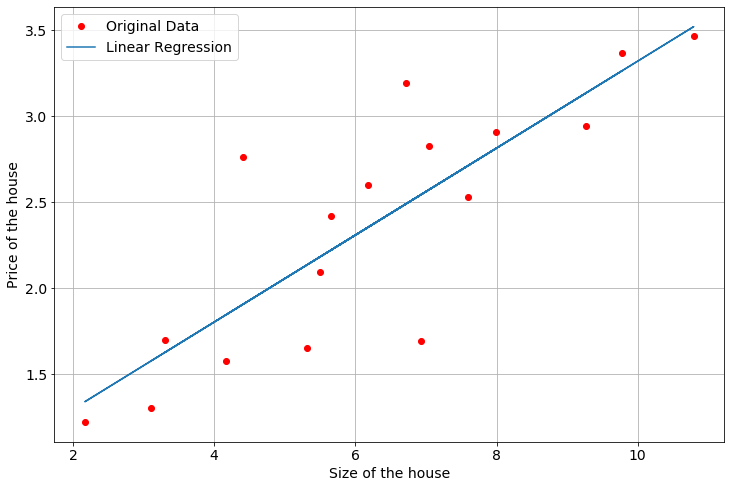

Final cost in test: 0.0781
Mean Absolute Square Difference:  0.0011545271


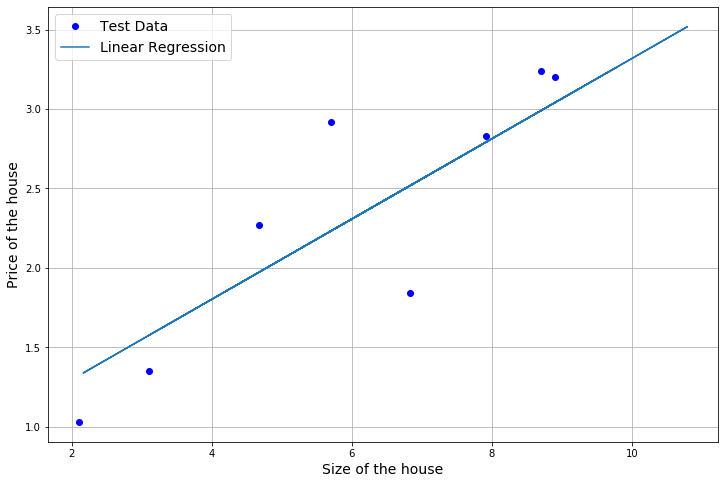

In [12]:
#Defining the initialitization of the variables
init = tf.global_variables_initializer()

#Initiating the session
with tf.Session() as sess:
    #Initiating the variables
    sess.run(init)
    
    #Training of the model
    for epoch in range(training_epochs):
        
        #Optimizitation with gradient descent
        sess.run(optimizer, feed_dict={X: train_X, y: train_y})
        
        #Display of each epoch
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, y: train_y})
            print("Epoch: {0:3} \t Error: {1:3.3} \t Weight: {2:3.3} \t b: {3:3.3} ".format(epoch+1,c,sess.run(W),sess.run(b)))
        
    #Training display
    print("\nOptimization concluded.")
    training_cost = sess.run(cost,feed_dict={X: train_X, y: train_y} )
    print('Final cost of the training: {0:2.3} - Final W: {1:2.3} - Final b: {2:2.3}\n'.format(training_cost,sess.run(W),sess.run(b)))
              
    #Plotting the result
    fig, ax = plt.subplots(figsize =(12,8))
    plt.plot(train_X, train_y, 'ro', label = 'Original Data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label = 'Linear Regression')
    plt.legend(fontsize = 14)
    plt.xlabel('Size of the house', fontsize = 14)
    plt.ylabel('Price of the house', fontsize = 14)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    plt.grid()
    plt.show()
            
    #Testing the model
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y))/(2*test_X.shape[0]),
                                          feed_dict={X: test_X, y: test_y})
    print('Final cost in test: {0:1.3}'.format(testing_cost))
    dif = abs(training_cost - testing_cost)
    print("Mean Absolute Square Difference: ", dif)
    
    #Test display
    fig, ax2 = plt.subplots(figsize=(12,8))
    plt.plot(test_X,test_y, 'bo', label = 'Test Data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label = 'Linear Regression')
    plt.legend(fontsize = 14)
    plt.xlabel('Size of the house', fontsize = 14)
    plt.ylabel('Price of the house', fontsize = 14)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    plt.grid()
    plt.show()
    
    
sess.close()